In [20]:
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import analysis.retroBO_analysis_functions as fns
import pickle

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use(pl.Path(os.getcwd())/'analysis/mystyle.mplstyle')
inch_conversion = 3.93701/100
page_width = 142.4 *inch_conversion
column_width = 67.2* inch_conversion

# Cross Validation Results

Notebook for plotting the results of the cross validation experiments.

In [21]:
save=True # whether to save
params=['r', 'm']

Load the data

In [22]:
path_name = pl.Path(os.getcwd()) /'results'
X_valid_df = pd.read_csv(path_name/'cross_validation_10_latent.csv', index_col=0)

Create a dataframe which is just the RMSE and NLPD of the test points on all the surfaces at each iteration, rather than
each surface seperately.

Also ensure all values of % train have the same number of runs.

In [23]:
if X_valid_df is not None:
    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(X_valid_df)
    all_results_df = X_valid_df[(X_valid_df.index == 'all') & (X_valid_df['seed'] <200)]
    print(n_runs_Xvalid)

pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs     150  149  149  150  150  146  109   70   73


In [24]:
if X_valid_df is not None:
    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(all_results_df)
    print(n_runs_Xvalid)

pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs     150  149  149  150  150  146  109   70   73


In [25]:
dfs = []
for pct_train in all_results_df['pct_train'].unique():
    df = all_results_df[all_results_df['pct_train'] == pct_train]
    seeds = df['seed'].unique()
    df = df[df['seed'].isin(seeds[:70])]
    dfs.append(df)
all_results_df = pd.concat(dfs)




In [26]:
if X_valid_df is not None:
    n_runs_Xvalid = fns.get_number_of_runs_Xvalid(all_results_df)
    print(n_runs_Xvalid)

pct_train  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
n_runs      70   70   70   70   70   70   70   70   70


Plot the cross validation results

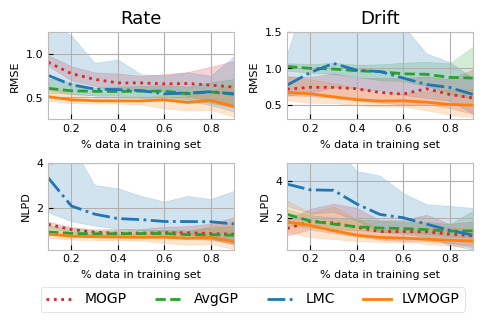

In [29]:

if X_valid_df is not None:
    fig, axs = plt.subplots(nrows=2, ncols=len(params), figsize=[5, 3])
    axs = axs.flatten()
    i = 0
    param_names = ['Rate', 'Drift', 'Rate', 'Drift']
    for metric in ['RMSE_z', 'NLPD_z']:
        for param in params:
            fns.plot_Xvalid_subplot(all_results_df, param, metric, ax=axs[i], traintest='test', legend=False)
            axs[i].set_xlim(all_results_df['pct_train'].min(),all_results_df['pct_train'].max())
            axs[i].set_title('')
            # axs[i].set_xlabel('')
            i+=1

    axs[0].set_title(f'{param_names[0]}')
    axs[1].set_title(f'{param_names[1]}')
    axs[0].set_ylim(0.25, 1.25)
    axs[1].set_ylim(0.3, 1.5)
    axs[2].set_ylim(0.15, 4)
    axs[3].set_ylim(0.3, 5)

    fig.legend(labels=['MOGP', 'AvgGP', 'LMC', 'LVMOGP'], loc="lower center", ncols=4,
               bbox_to_anchor=(0.53, -0.08))
    # fig.supxlabel(f'% data in training set')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    # plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.savefig(pl.Path(os.getcwd()) /f'analysis/plots/cross_validation_10_latent.pdf', bbox_inches='tight')
    # plt.savefig(f'plots/cross_validation.png', bbox_inches='tight', dpi=2000)
    # plt.savefig(f'plots/cross_validation.svg', bbox_inches='tight')